##A1

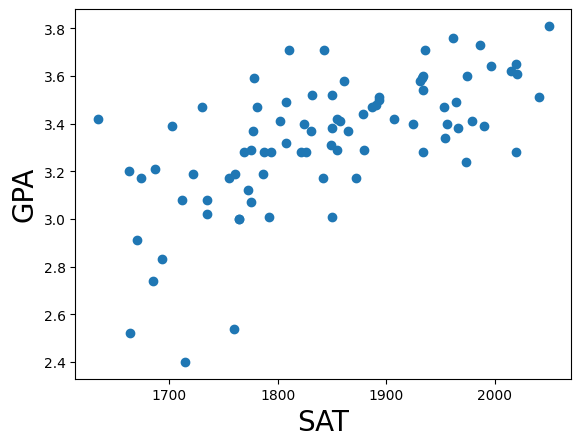

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Change to data path on your computer
data = pd.read_csv("/content/SAT_GPA.csv")
# Show the description of data
data.describe()
# Set to training data (x, y)
y = data['GPA']
x = data['SAT']
# Remind that we need to put component x_0 = 1 to x
plt.scatter(x,y)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

In [197]:
print(x)
print(y)

0     1714
1     1664
2     1760
3     1685
4     1693
      ... 
79    1936
80    1810
81    1987
82    1962
83    2050
Name: SAT, Length: 84, dtype: int64
0     2.40
1     2.52
2     2.54
3     2.74
4     2.83
      ... 
79    3.71
80    3.71
81    3.73
82    3.76
83    3.81
Name: GPA, Length: 84, dtype: float64


In [198]:
k = 8
def distance(array, value):
  array = np.array(array)
  return abs(array-value)

def find_nearest_index(array, value, k):
  array_D = distance(array, value)
  return np.argsort(array_D)[:k]


data_len = len(x)
X_train = np.array(x[:64])
Y_train = np.array(y[:64])
X_test = np.array(x[64:data_len])
Y_test = np.array(y[64:data_len])
k = 8

In [199]:
Y_pred = np.zeros(len(X_test))

for i in range(len(X_test)):
  indexis = find_nearest_index(X_train, X_test[i], k)
  for id in indexis:
    Y_pred[i] = Y_pred[i] + Y_train[id]
  Y_pred[i] = Y_pred[i]/len(indexis)
  print(Y_pred[i], ' | ', Y_test[i])

3.3925000000000005  |  3.51
3.2749999999999995  |  3.52
3.2950000000000004  |  3.52
3.3975000000000004  |  3.54
3.2949999999999995  |  3.58
3.3974999999999995  |  3.58
3.3975000000000004  |  3.59
3.2587500000000005  |  3.59
3.3899999999999997  |  3.6
3.3975000000000004  |  3.6
3.3874999999999993  |  3.61
3.3874999999999993  |  3.62
3.3662499999999995  |  3.64
3.3874999999999993  |  3.65
3.295  |  3.71
3.3975000000000004  |  3.71
3.30875  |  3.71
3.3662500000000004  |  3.73
3.37625  |  3.76
3.3874999999999993  |  3.81


In [200]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')


MSE: 0.08137789062500005
MAE: 0.2711875000000001
R^2: -10.951518670142468


##A2

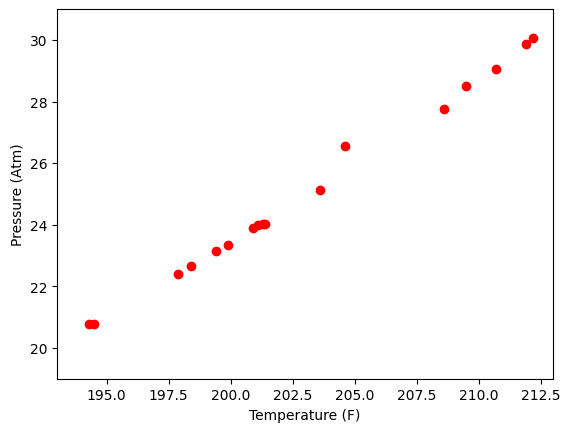

In [201]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt

# Temp (F degree)
X = np.array([[194.5, 194.3, 197.9, 198.4, 199.4, 199.9, 200.9, 201.1, 201.4, 201.3, 203.6, 204.6, 209.5, 208.6, 210.7, 211.9, 212.2]]).T
# Press (Atm)
y = np.array([[20.79,20.79,22.4,22.67,23.15,23.35,23.89,23.99,24.02,24.01,25.14,26.57,28.49,27.76,29.04,29.88,30.06]]).T

# Visualize data
plt.plot(X, y, 'ro')
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()




In [202]:
# Tách dữ liệu: sử dụng 16 mẫu đầu tiên cho training và phần còn lại cho validation
X_train = X[:16]       # Lấy 16 phần tử đầu tiên (dạng mảng 2 chiều)
y_train = y[:16]

X_val = X[16:]         # Phần tử từ vị trí 16 trở đi
y_validate = y[16:]

print(X_val)
print(y_validate)
print(len(y_validate))

[[212.2]]
[[30.06]]
1


###Manual

In [203]:
k = 4
Y_pred = np.zeros(len(X_val))

for i in range(len(X_val)):
    indices = find_nearest_index(X_train, X_val[i], k)
    Y_pred[i] = np.mean(y_train[indices])
    print(f"Predicted: {Y_pred[i]} | Actual: {y_validate[i][0]}")



Predicted: 20.79 | Actual: 30.06


###Using Pre-trained model

In [204]:
from sklearn.neighbors import KNeighborsRegressor

In [205]:
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_val)

In [206]:
print(f"Predicted: {Y_pred[i]} | Actual: {y_validate[i][0]}")

Predicted: [28.7925] | Actual: 30.06


In [207]:
mse = mean_squared_error(y_validate, Y_pred)
mae = mean_absolute_error(y_validate, Y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')

MSE: 1.6065562499999957
MAE: 1.2674999999999983


##A3

In [208]:
import math
import numpy as np
with open('/content/fuel.txt') as f:
  lines = f.readlines()

x_data = []
y_data = []
lines.pop(0)

for line in lines:
  splitted = line.replace('\n', '').split(',')
  splitted.pop(0)
  splitted = list(map(float, splitted))
  fuel = 1000 * splitted[1] / splitted[5]
  dlic = 1000 * splitted[0] / splitted[5]
  logMiles = math.log2(splitted[3])
  y_data.append([fuel])
  x_data.append([splitted[-1], dlic, splitted[2], logMiles])

x_data = np.asarray(x_data)

In [209]:
y_data = np.asarray(y_data)

In [210]:
# Tách dữ liệu: sử dụng 40 mẫu đầu tiên cho training và phần còn lại cho validation
X_train = x_data[:40]
y_train = y_data[:40]

X_val = x_data[40:]
y_val = y_data[40:]

print(X_val)
print(y_val)
print(len(y_val))

[[1.60000000e+01 9.14852671e+02 2.43210000e+04 1.60138242e+01]
 [2.20000000e+01 9.43895904e+02 2.61150000e+04 1.63505249e+01]
 [2.00000000e+01 9.42044365e+02 2.62390000e+04 1.64223605e+01]
 [2.00000000e+01 8.35295555e+02 2.78710000e+04 1.81982868e+01]
 [2.45000000e+01 9.35788546e+02 2.39070000e+04 1.53652288e+01]
 [2.00000000e+01 1.07528820e+03 2.69010000e+04 1.38028193e+01]
 [1.75000000e+01 8.89919514e+02 3.11620000e+04 1.61098511e+01]
 [2.30000000e+01 9.30856246e+02 3.15280000e+04 1.63053671e+01]
 [2.56500000e+01 9.04893601e+02 2.19150000e+04 1.51751207e+01]
 [2.73000000e+01 8.82329081e+02 2.82320000e+04 1.67816543e+01]
 [1.40000000e+01 9.70752746e+02 2.72300000e+04 1.47361905e+01]]
[[711.73305769]
 [697.05277706]
 [638.23106095]
 [681.10013659]
 [591.49994589]
 [691.02271186]
 [681.03112144]
 [576.06974956]
 [562.4109333 ]
 [581.79371695]
 [842.79175243]]
11


In [211]:
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_val)
print(f"Predicted: {Y_pred[i]} | Actual: {y_val[i][0]}")

Predicted: [655.90295124] | Actual: 711.7330576894062


In [212]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_val, Y_pred)
mae = mean_absolute_error(y_val, Y_pred)
r2 = r2_score(y_val, Y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')


MSE: 6956.363785903602
MAE: 65.31640461096231
R^2: -0.13937316912292097


##B1

In [213]:
# Building Xbar
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

# Calculating weights of the fitting line
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)

w =  [[-81.06372713]
 [  0.5228924 ]]


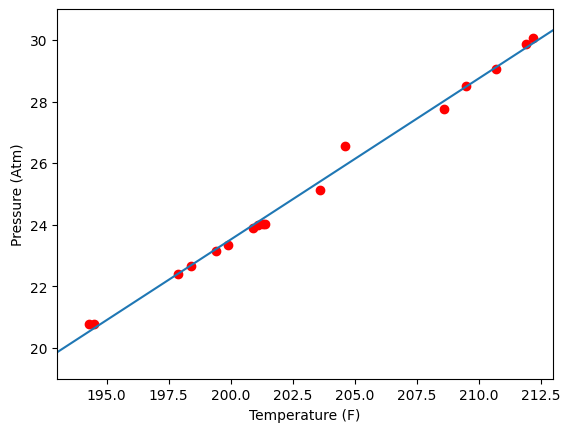

In [214]:
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)
# Preparing the fitting line
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(193, 213, 2)
y0 = w_0 + w_1*x0

# Drawing the fitting line
plt.plot(X.T, y.T, 'ro') # data
plt.plot(x0, y0) # the fitting line
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()

##B2

####Dùng QR

In [215]:
import math
import numpy as np
with open('/content/fuel.txt') as f:
  lines = f.readlines()

x_data = []
y_data = []
lines.pop(0)

for line in lines:
  splitted = line.replace('\n', '').split(',')
  splitted.pop(0)
  splitted = list(map(float, splitted))
  fuel = 1000 * splitted[1] / splitted[5]
  dlic = 1000 * splitted[0] / splitted[5]
  logMiles = math.log2(splitted[3])
  y_data.append([fuel])
  x_data.append([splitted[-1], dlic, splitted[2], logMiles])

x_data = np.asarray(x_data)

In [216]:
y_data = np.asarray(y_data)

In [217]:
def qr_householder(A):
  #""" Compute QR decomposition of A using Householder reflection"""
  M = A.shape[0]
  N = A.shape[1]

  # set Q to the identity matrix
  Q = np.identity(M)

  # set R to zero matrix
  R = np.copy(A)

  for n in range(N):
    # vector to transform
    x = A[n:, n]
    k = x.shape[0]
    ro = -np.sign(x[0]) * np.linalg.norm(x)

    # compute the householder vector v
    e = np.zeros(k)
    e[0] = 1
    v = (1 / (x[0] - ro)) * (x - (ro * e))

    # apply v to each column of A to find R
    for i in range(N):
      R[n:, i] = R[n:, i] - (2 / (v@v)) * ((np.outer(v, v)) @ R[n:, i])

    # apply v to each column of Q
    for i in range(M):
      Q[n:, i] = Q[n:, i] - (2 / (v@v)) * ((np.outer(v, v)) @ Q[n:, i])

  return Q.transpose(), R

In [218]:
def linear_regression(x_data, y_data):
# """
# This function calculate linear regression base on x_data and y_data
# :param x_data: vector
# :param y_data: vector
# :return: w (regression estimate)
# """

# add column 1
  x_bars = np.concatenate((np.ones((x_data.shape[0], 1)), x_data), axis=1)

  Q, R = qr_householder(x_bars) # QR decomposition
  R_pinv = np.linalg.pinv(R) # calculate inverse matrix of R
  A = np.dot(R_pinv, Q.T) # apply formula

  return np.dot(A, y_data)

In [219]:
w = linear_regression(x_data, y_data) # get result
w = w.T.tolist()

In [220]:
print(w)

[[154.19284457730845, -4.227983208329615, 0.4718712134419839, -0.006135330970417756, 18.545274506048013]]


In [221]:
line = ['Intercept', 'Tax', "Dlic", "Income", 'LogMiles']
res = list(zip(line, w[0]))
for o in res:
  print("{: >20}: {: >10}".format(*o))

           Intercept: 154.19284457730845
                 Tax: -4.227983208329615
                Dlic: 0.4718712134419839
              Income: -0.006135330970417756
            LogMiles: 18.545274506048013


####Dùng sklearn

In [222]:
from sklearn import datasets, linear_model
# Load training data here and assign to Xbar (obs. Data) and y (label)
# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False)
# fit_intercept = False for calculating the bias
regr.fit( np.concatenate((np.ones((x_data.shape[0], 1)), x_data), axis=1), y_data)
# regr.fit( Xbar, y)

for name, coef in zip(line, regr.coef_[0]):
  print(f"{name}:{coef}")

Intercept:154.1928445773375
Tax:-4.227983208329617
Dlic:0.471871213441983
Income:-0.0061353309704177406
LogMiles:18.545274506048017


In [223]:
Y_pred = knn.predict(X_val)
for i in range(len(X_val)):
    print(f"Predicted: {Y_pred[i]} | Actual: {y_val[i]}")

Predicted: [655.90295124] | Actual: [711.73305769]
Predicted: [638.45605803] | Actual: [697.05277706]
Predicted: [638.45605803] | Actual: [638.23106095]
Predicted: [611.92699102] | Actual: [681.10013659]
Predicted: [655.90295124] | Actual: [591.49994589]
Predicted: [644.48982949] | Actual: [691.02271186]
Predicted: [588.04446806] | Actual: [681.03112144]
Predicted: [605.09984957] | Actual: [576.06974956]
Predicted: [662.65313963] | Actual: [562.4109333]
Predicted: [584.95242916] | Actual: [581.79371695]
Predicted: [644.48982949] | Actual: [842.79175243]


##B3 *Bài tập tự làm 1*

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Change to data path on your computer
data = pd.read_csv("/content/SAT_GPA.csv")
# Show the description of data
data.describe()
# Set to training data (x, y)
y = data['GPA']
x = data['SAT']

####i

In [225]:
r = np.corrcoef(x, y)[0, 1]

print(f"Hệ số tương quan Pearson: {r:.4f}")

Hệ số tương quan Pearson: 0.6372


####ii

In [226]:
#Sử dụng lại dữ liệu A1, chia thành 2 tập
data_len = len(x)
X_train = np.array(x[:64])
Y_train = np.array(y[:64])
X_test = np.array(x[64:data_len])
Y_test = np.array(y[64:data_len])

In [227]:
X_train = np.asarray(X_train).reshape(-1, 1)
Y_train = np.asarray(Y_train).reshape(-1, 1)

In [228]:
print(Y_train)

[[2.4 ]
 [2.52]
 [2.54]
 [2.74]
 [2.83]
 [2.91]
 [3.  ]
 [3.  ]
 [3.01]
 [3.01]
 [3.02]
 [3.07]
 [3.08]
 [3.08]
 [3.12]
 [3.17]
 [3.17]
 [3.17]
 [3.17]
 [3.19]
 [3.19]
 [3.19]
 [3.2 ]
 [3.21]
 [3.24]
 [3.28]
 [3.28]
 [3.28]
 [3.28]
 [3.28]
 [3.28]
 [3.28]
 [3.29]
 [3.29]
 [3.29]
 [3.31]
 [3.32]
 [3.34]
 [3.37]
 [3.37]
 [3.37]
 [3.38]
 [3.38]
 [3.39]
 [3.39]
 [3.4 ]
 [3.4 ]
 [3.4 ]
 [3.41]
 [3.41]
 [3.41]
 [3.42]
 [3.42]
 [3.42]
 [3.44]
 [3.47]
 [3.47]
 [3.47]
 [3.47]
 [3.48]
 [3.49]
 [3.49]
 [3.5 ]
 [3.51]]


####iii

In [229]:
#Xây dựng mô hình hồi quy dựa trên phương pháp phân rã QR bằng phản xạ Householder
W = linear_regression(X_train, Y_train)

In [230]:
print(W)

[[0.83820976]
 [0.00131839]]


In [231]:
X_test = X_test.reshape(-1, 1)  # Chuyển thành (20,1)
X_test = np.column_stack((np.ones(len(X_test)), X_test))

In [232]:
print(W.shape)
print(X_test.shape)

(2, 1)
(20, 2)


In [233]:
Y_pred = np.dot(X_test, W)

####iv

In [234]:
# Tính các độ đo đánh giá
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# In kết quả
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2: {r2:.4f}")

MSE: 0.0726
MAE: 0.2488
R^2: -9.6680


####v

In [235]:
#Nhận xét : phương pháp có độ chính xác tương dương nhau

##B4 *Bài tập 2*

In [236]:
# Đọc dữ liệu, bỏ qua cột đầu tiên (ID)
data = np.loadtxt("/content/vidu4_lin_reg.txt", delimiter=" ", skiprows=1)

# Tách X4 (các cột trừ cột cuối) và Y4 (cột cuối)
X4 = data[:, 1:-1]  # Bỏ ID và cột cuối
Y4 = data[:, -1]    # Chỉ lấy cột cuối

print(X4)
print(Y4)

[[ 56.    21.   160.    14.     6.  ]
 [ 76.    18.   150.    12.     4.97]
 [ 63.    16.   160.     4.4    6.39]
 [ 78.    20.   100.     4.     7.  ]
 [ 87.    20.   110.     4.6    4.1 ]
 [ 76.    19.   150.     4.6    2.74]
 [ 55.    31.   160.     5.5    4.6 ]
 [ 74.    22.   100.     6.8    5.04]
 [ 81.    21.   120.     5.8    4.75]
 [ 77.    24.   160.     5.4    6.94]
 [ 29.    20.   120.     3.8    4.84]
 [ 71.    22.   160.     3.3    6.63]
 [ 77.    21.   160.     5.1    4.93]
 [ 59.    18.   150.     6.     4.55]
 [ 58.    27.   130.     6.9    6.7 ]
 [ 34.    19.   130.     4.5    3.2 ]
 [ 74.    22.   100.    10.6    4.3 ]
 [ 61.    19.   170.    18.     6.8 ]
 [ 53.    20.   130.    25.     5.5 ]
 [ 65.    28.   140.     6.5    6.8 ]
 [ 80.    19.   160.     4.8    5.74]
 [ 71.    25.   160.     6.2    6.9 ]
 [ 90.    24.   160.     4.7    7.  ]
 [ 44.    24.   120.     6.     3.4 ]
 [ 91.    27.   150.     6.1    4.92]
 [ 75.    22.   160.     6.2    6.08]
 [ 60.    24

####a. **Xác định hệ số bằng QR HouseHold**

In [237]:
print(X4.shape)
print(Y4.shape)

(100, 5)
(100,)


In [238]:
W4 = linear_regression(X4, Y4)

In [239]:
print(W4)

[-0.10802908  0.00994694 -0.00020655  0.00218137  0.0076701   0.03847025]


####b.

In [240]:
# Chia dữ liệu thành train và test
X4_train = X4[:80]
Y4_train = Y4[:80]

X4_test = X4[80:]
Y4_test = Y4[80:]
print(Y4_test.shape)

(20,)


In [241]:
W4_v2 = linear_regression(X4_train, Y4_train)
W4_v2 = W4_v2.reshape(-1, 1)
print(W4_v2.shape)

(6, 1)


In [242]:
X4_test = np.column_stack((np.ones(len(X4_test)), X4_test))
print(X4_test.shape)

(20, 6)


In [243]:
Y4_pred = np.dot(X4_test, W4_v2)
print(Y4_pred)

[[0.91012272]
 [0.78452963]
 [1.22339369]
 [0.96085817]
 [0.96836123]
 [1.05009561]
 [1.19694736]
 [1.0521678 ]
 [0.9936207 ]
 [0.68503543]
 [0.78429172]
 [0.77109845]
 [1.19748204]
 [1.06844174]
 [0.99721921]
 [1.03380704]
 [1.14558205]
 [1.19228584]
 [1.29236178]
 [1.26252546]]


####c.

In [244]:
epsilon = Y4_test - Y4_pred  # Sai số

# Tính kỳ vọng (mean) của sai số
mean_error = np.mean(epsilon)

# Tính phương sai (variance) của sai số
variance_error = np.var(epsilon, ddof=0)

print("Kỳ vọng của sai số:", mean_error)
print("Phương sai của sai số:", variance_error)


Kỳ vọng của sai số: 0.07998861696197125
Phương sai của sai số: 0.3190263003695715


##B5 *Bài tập tự làm 3*

In [245]:
# Đọc dữ liệu
data = pd.read_csv("/content/real_estate.csv", sep=",")

data = data.iloc[:, 1:]  # Bỏ cột đầu tiên (No)
data.rename(columns=lambda x: x.strip(), inplace=True)  # Xóa khoảng trắng ở tên cột
data["X1 transaction date"] = data["X1 transaction date"].astype(int)  # Chỉ lấy phần nguyên (năm)

In [246]:
# Chia tập train và validation
train_data = data.iloc[:350]
val_data = data.iloc[350:]

X_train = train_data.iloc[:, :-1].values  # Cột X1 đến X6
Y_train = train_data.iloc[:, -1].values  # Cột Y

X_val = val_data.iloc[:, :-1].values
Y_val = val_data.iloc[:, -1].values

In [247]:
#Hồi quy tuyến tính
lr_model = linear_model.LinearRegression(fit_intercept=False)
lr_model.fit(X_train, Y_train)
Y_pred_lr = lr_model.predict(X_val)

# Tính tổng bình phương sai số (SSE) cho hồi quy tuyến tính
sse_lr = np.sum((Y_val - Y_pred_lr) ** 2)
print(f"SSE - Hồi quy tuyến tính: {sse_lr}")

# 5️⃣ K-NN với K = 18
knn_model = KNeighborsRegressor(n_neighbors=18)
knn_model.fit(X_train, Y_train)
Y_pred_knn = knn_model.predict(X_val)

# Tính SSE cho K-NN
sse_knn = np.sum((Y_val - Y_pred_knn) ** 2)
print(f"SSE - K-NN (K=18): {sse_knn}")

SSE - Hồi quy tuyến tính: 4100.381553060164
SSE - K-NN (K=18): 2820.7983024691357


In [248]:
# Do sse của K-NN nhỏ hơn => K-NN tốt hơn